In [1]:
import numpy as np
from sympy import *
from IPython.display import Markdown, display
#import matplotlib.pyplot as plt
import time

This notebook solves the stochastic Poisson's equation $$k(\theta) \partial_{xx} u(x) = f(x)$$ for $x \in \Omega := [0,1]$, $k(\theta) \approx$ log-normal$(\mu, \sigma^2)$ and boundary conditions $u(0) = a$ and $u(1) = b$ using Monte Carlo. Each sampled problem is solved using a Galerkin method. We start by importing the deterministic Galerkin code.

In [2]:
%run Galerkin1DElliptic.ipynb

In [3]:
N = 20                               # number of spacialpoints
Omega = np.linspace(0, 1, N)         # spacial domain
f = lambda x: 1                     # source function
u0 = 0                               # u(0)
uN = 0                               # u(1)
dx = Omega[1] - Omega[0]             # step size

In particular, this notebook preforms 3 different tasks:
    
    1. Computes the solution for a given number of Monte Carlo iterations;
    2. Computes the mean for different number of sample solutions;
    3. Computes the variance of the sample solutions;
    4. Gives the time it takes to complete each one of these tasks as well as the total time.

In [4]:
itr = 750  # number of iterations - about 2 minutes running time for 1000
if itr > 2000:
    print('This is going to take a while...')
miu = 1     # mean of the convection term
sigma = 0.1 # variance of the convection term

k_vector = np.random.normal(miu, sigma, itr) # vector of convective terms

### Computing the exact solution of our problem

The true solution of the problem is given by

$$
\mathbb{E}[u(x,e^k)] = -\dfrac{f x^2}{2\mathbb{E}[e^k]} + \left( \mathbb{E}[u_1] + \frac{f}{2 \mathbb{E}[e^k]} - \mathbb{E}[u_0] \right)x + \mathbb{E}[u_0]
$$

Text(0.5,1,'The mean exact solution for $k(\\theta) \\partial_{xx} u(x) = -f(x)$')

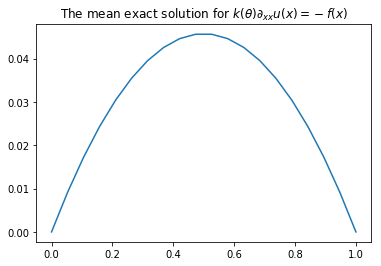

In [5]:
# vectorise source vector and boundary conditions
f_vector = f(Omega)*np.ones(N)
u0_vector = u0*np.ones(N)
uN_vector = uN*np.ones(N)

#vectorise means
mean_k = np.exp(miu + sigma**2/2)
mean_uN = np.mean(uN_vector)
mean_u0 = np.mean(u0_vector)

#exact solution
exact_solution =  -(f_vector*Omega**2)/(2*mean_k) + \
                  (mean_uN + f_vector/(2*mean_k) - mean_u0)*Omega - mean_u0
    
plt.plot(Omega,exact_solution)
plt.title('The mean exact solution for' + r' $k(\theta) \partial_{xx} u(x) = -f(x)$')

### 1.  Computes the solution for a given number of Monte Carlo iterations;

In [6]:
solutions = np.zeros((itr, N))

start_time = time.time()
for i in range(itr):
    k = lambda x: np.exp(k_vector[i]) # we want k to be log-normal
    solutions[i,] = Galerkin1DElliptic(N, f, 0, 1, u0, uN, k, np.zeros(N))
end_time = time.time()
print('It takes ', end_time - start_time, ' seconds to find ', itr, ' Monte Carlo iterations')

It takes  64.13112282752991  seconds to find  750  Monte Carlo iterations


The plot of the solutions is given below:

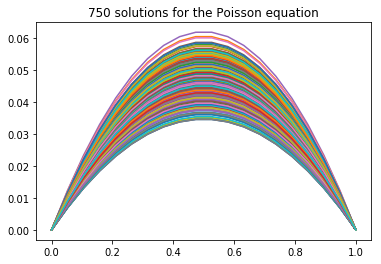

In [7]:
for i in range(itr):
    plt.plot(Omega, solutions[i,])
    
plt.title(str(itr) + " solutions for the Poisson equation")
plt.show()

### 2.  Computes the mean of the sample solutions

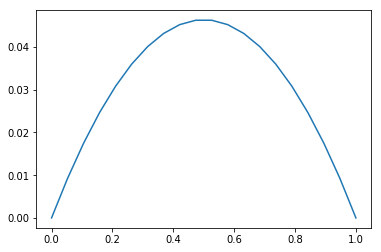

In [8]:
plot_mean = solutions_mean = np.mean(solutions, axis=0)
plt.plot(Omega,solutions_mean)

In [9]:
solutions_1 = solutions[0:1]
solutions_4 = solutions[0:4,:]
solutions_16 = solutions[0:16,:]
solutions_64 = solutions[0:64,:]

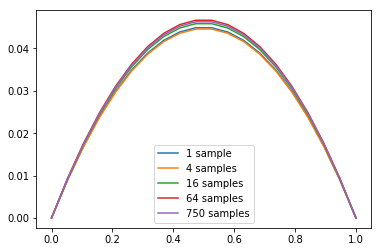

In [10]:
#sample solutions
solutions_1_mean = np.mean(solutions_1, axis=0)
solutions_4_mean = np.mean(solutions_4, axis=0)
solutions_16_mean = np.mean(solutions_16, axis=0)
solutions_64_mean = np.mean(solutions_64, axis=0)

#plot for each sample solution
plot_mean_1 = plt.plot(Omega,solutions_1_mean)
plot_mean_4 = plt.plot(Omega,solutions_4_mean)
plot_mean_16 = plt.plot(Omega,solutions_16_mean)
plot_mean_64 = plt.plot(Omega,solutions_64_mean)
plot_mean = plt.plot(Omega,solutions_mean)

#legend
plt.legend(['1 sample', '4 samples', '16 samples', '64 samples', str(itr) + ' samples'], loc = 'best')
plt.show()

### Convergence test

In [21]:
error_vector = []
solution_plots = []
error_plots = []


for i in range(1,itr):
    solution_sample = np.mean(solutions[0:i,:],axis=0)
    error_vector.append(np.linalg.norm(solution_sample-exact_solution))

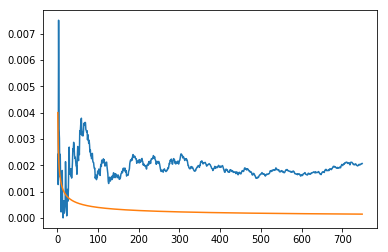

In [26]:
x = np.asarray(range(1,itr))
plt.plot(x, error_vector, x, 1/np.sqrt(x)*0.004)

In [23]:
error_vector[0]-error_vector[-1]

0.00034238567463216671

### 3.  Computes the variance of the sample solutions

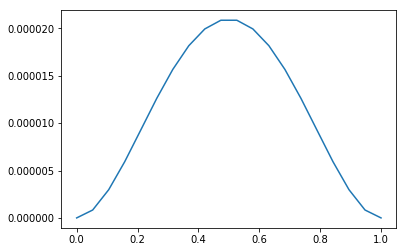

In [14]:
solutions_var = np.var(solutions, axis=0)
plt.plot(Omega,solutions_var)

In [15]:
# 